In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
df = pd.read_csv('play_tennis.csv')
  

y = df['play']
X = df.drop('play', axis = 1)


In [16]:

le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])  
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
extra_tree_forest.fit(X, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

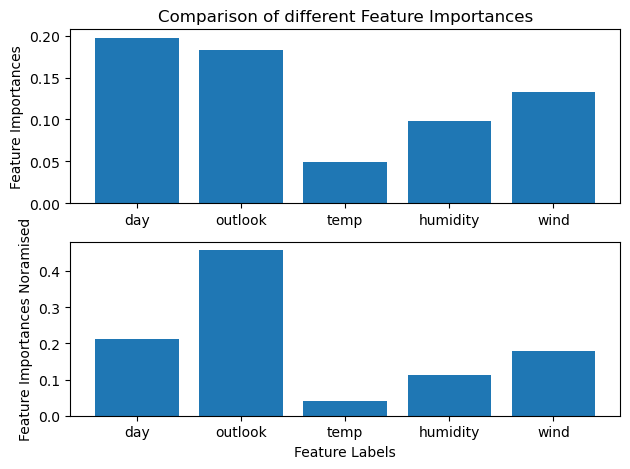

In [25]:
plt.subplot(2,1,1)
plt.bar(X.columns, feature_importance_normalized)

plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')

plt.subplot(2,1,2)
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances Noramised')

plt.tight_layout()
plt.show()
plt.show()